In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import Orders_products_all
Orders_products_all = pd.read_pickle(r'/Users/davidscheider/anaconda_projects/Instacart Basket Analysis/02 Data/Prepared Data/Orders_products_all.pkl')

In [4]:
# importing path
path = r'/Users/davidscheider/anaconda_projects/Instacart Basket Analysis'

<Axes: ylabel='Frequency'>

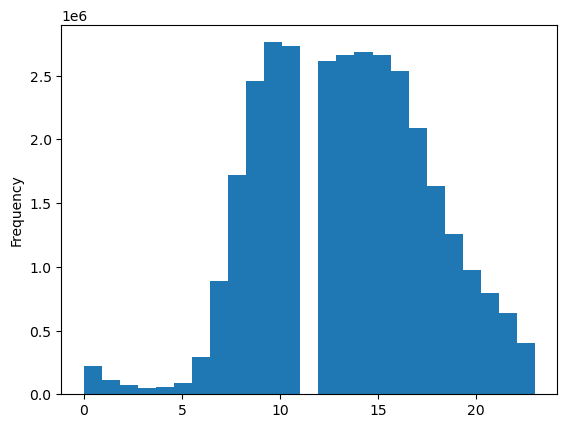

In [7]:
# Create histogram of the "order_hour_of_day" column
Orders_products_all['order_hour_of_day'].plot.hist(bins = 25)

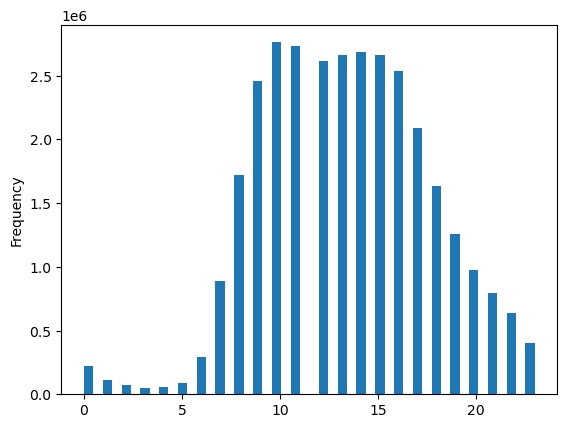

In [41]:
Histogram = Orders_products_all['order_hour_of_day'].plot.hist(bins = 48)

The histogram clearly shows the sales are highest in the late morning (after 10am), stay relatively high until the afternoon and decline after 5pm. The sales frequency during the day is normally distributed.

Values for 12pm seem to be missing, though.

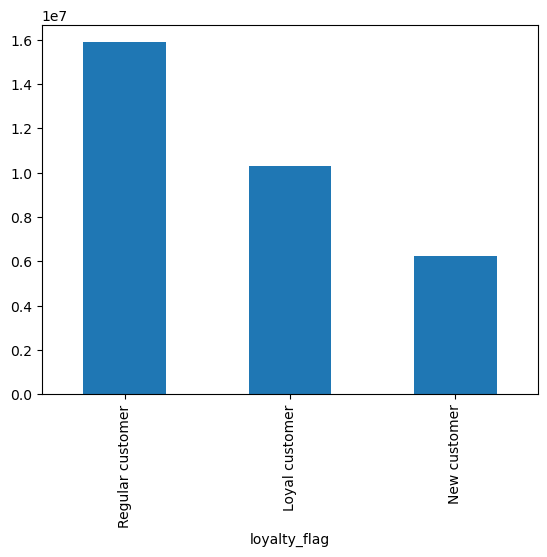

In [53]:
# create bar chart for "loyalty_flag" column
bar_chart = Orders_products_all['loyalty_flag'].value_counts().plot.bar()

In [13]:
# Get percentages directly
percentages = Orders_products_all['loyalty_flag'].value_counts(normalize=True) * 100

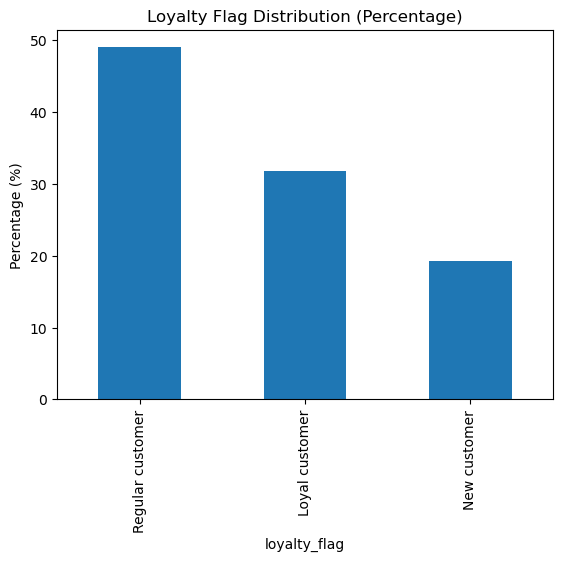

In [46]:
# Create bar chart with percentages
percentages.plot.bar()
plt.ylabel('Percentage (%)')
plt.title('Loyalty Flag Distribution (Percentage)')
plt.show()

In [15]:
# Print the actual percentage values
print(percentages)

loyalty_flag
Regular customer    48.995170
Loyal customer      31.736046
New customer        19.268784
Name: proportion, dtype: float64


In [16]:
# create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(Orders_products_all)) <= 0.7

In [17]:
# Store 70% of the samples in the dataframe big
big = Orders_products_all[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = Orders_products_all[~dev]

In [19]:
len(Orders_products_all)

32406041

In [20]:
# Check if len(big) + len(small) add up
len(big) + len(small)

32406041

In [22]:
# create subset
df_2 = small[['order_hour_of_day','prices']]

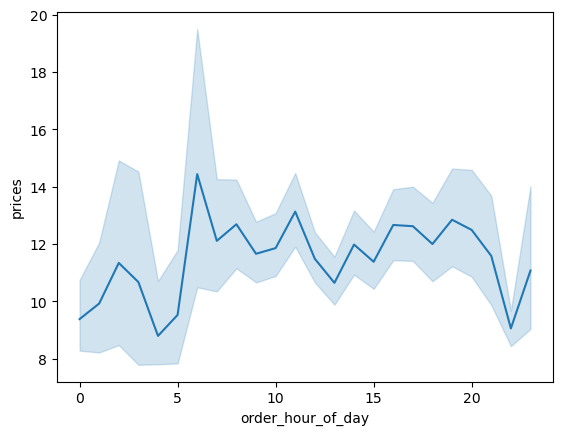

In [34]:
# plot line chart 
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

For some reason, the prices of purchased items spike at 6am. After that they decline steadly.

In [26]:
# create subset
df_3 = small[['Age','fam_status']]

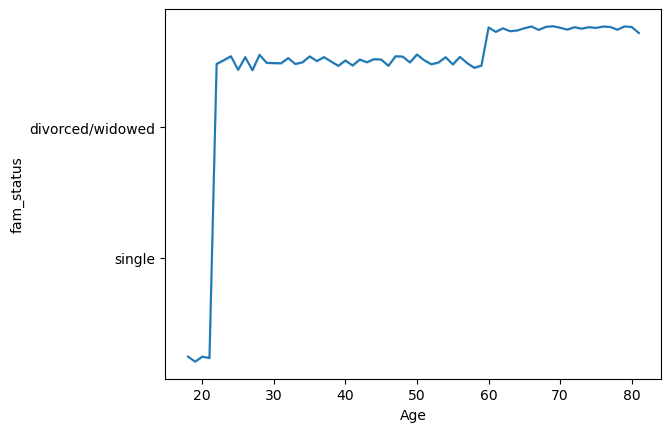

In [28]:
# plot line chart 
line = sns.lineplot(data = df_3, x = 'Age',y = 'fam_status')

# I don't see why this chart should be any helpful

In [29]:
Orders_products_all.head()

,Unnamed: 0,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First_Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [30]:
# create subset
df_4 = small[['Age','n_dependants']]

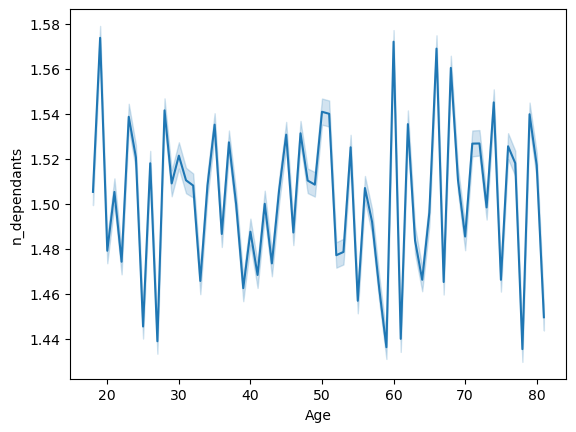

In [32]:
# plot line chart 
line_2 = sns.lineplot(data = df_4, x = 'Age',y = 'n_dependants')

The data suggests there is no strong relationship between age and number of dependents. Unlike what you might expect (perhaps older people having fewer dependents as children become independent), the number of dependents appears to be fairly constant across different age groups in your dataset.
Age does not appear to be a strong predictor of the number of dependents in this dataset. The relationship is essentially flat with random fluctuation around 1.5 dependents per person.

In [33]:
# export line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'line_Age_Dependants.png'))

In [35]:
# export other line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'line_order_hour_of_day_prices'))

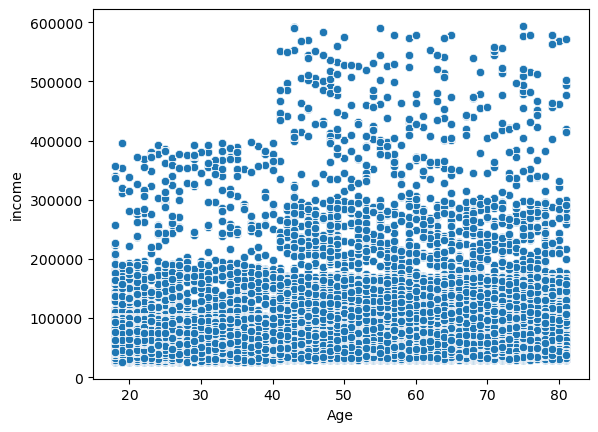

In [39]:
# create scatterplot

Income_Age_Scatterplot = sns.scatterplot(x = 'Age', y = 'income',data = Orders_products_all)

There is a clear relationship between age and income. Older people tend to have a higher income than younger people. Although, there are also older people with low income.

Age explains some but not all income variation
Peak earning potential appears to be in middle age (50s-60s)
There's substantial income inequality within each age group
The relationship isn't perfectly linear, suggesting career stages or industry effects

In [50]:
# export scatterplot
Income_Age_Scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'scatterplot_income_Age'))

In [43]:
# export histogram
Histogram.figure.savefig(os.path.join(path, '04 Analysis', 'Histogram_orders_hour_of_day'))

In [51]:
plt.savefig(os.path.join(path, '04 Analysis', 'bar chart'))

<Figure size 640x480 with 0 Axes>

In [54]:
bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'bar chart loyalty'))